

# Project: Women education and its impact on econimic and human wellbeing (Investigate a Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected 6 datasets from Gapminder for my Analysis on women education and its impact on economic and human wellbeing.

***Following are the datasets and their description :

>'Completition rate total.csv'                 - Primary completion rate is the percentage of students completing the                                                   last year of primary school.

>'Completition rate male.csv'                  - Primary completion rate is the percentage of male students completing                                                 the last year of primary school. 

>'Completition rate female.csv'                - Primary completion rate is the percentage of female students                                                           completing the last year of primary school.

>'indicator life_expectancy_at_birth.csv'      - The average number of years a newborn child would live if current                                                     mortality patterns were to stay the same.

>'indicator_f 15-64 labour to pop percent.csv' - For age group 15-64, percentage of female labor to total female                                                       population.

>'indicator_gdp_percapita_growth.csv'          - GDP per capita growth (annual %)


***Following are the questions I would like to explore with the above datasets:

>Question 1: 
>Has Primary School completion rate of  women increased through the years and therefore difference between Male and Women Primary school completion rate decreased and does it impact female labour participation rate?

>Question 2:
>How does female labour participation rate impact economic well being or GDP per capita growth ?

>Question 3:
>Does GDP per capita growth play a role in human wellbeing or life expectancy ?


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Load the data

In [27]:
df1 = pd.read_csv('Completition rate total.csv')
df2 = pd.read_csv('Completition rate male.csv')
df3 = pd.read_csv('Completition rate female.csv')
df6 = pd.read_csv('indicator life_expectancy_at_birth.csv')
df7 = pd.read_csv('indicator_f 15-64 labour to pop percent.csv')
df8 = pd.read_csv('indicator_gdp_percapita_growth.csv')
df1.head()

,"Primary completion rate, total (% of relevant age group)",1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,15.64668,NaN,NaN,16.35913,17.93986,...,NaN,NaN,NaN,34.05853,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.11135,98.42509,NaN,NaN,NaN,89.90986,89.27898,86.26271,88.83048
4,Algeria,NaN,NaN,43.34175,45.40215,47.71764,53.25078,59.14851,61.87218,64.18890,...,90.22092,91.66670,92.98789,94.44502,NaN,96.39509,115.66131,94.12662,95.98508,94.36620


### Calculation of Average (mean)
Mean is taken for each dataframe along the rows ie for each year. Null values are retained which says that information is not collected for those years.

In [28]:
df_cr_total = df1.mean(numeric_only=True) 
df_cr_male = df2.mean(numeric_only=True) 
df_cr_female = df3.mean(numeric_only=True) 
df_life_mean = df6.mean(numeric_only=True) 
df_f_labour_mean = df7.mean(numeric_only=True) 
df_gdp_mean = df8.mean(numeric_only=True) 
df_gdp_mean.head()

1960         NaN
1961    1.742809
1962    3.044724
1963    2.362350
1964    3.548652
dtype: float64

In [29]:
##Merge the dataframes
df_f_labour_mean.to_frame()
df_gdp_mean.to_frame()
df_life_mean.to_frame()
df_cr_total.to_frame()
df_cr_male.to_frame()
df_cr_female.to_frame()
df11 = pd.concat([df_cr_total,df_cr_male,df_cr_female,df_f_labour_mean,df_gdp_mean,df_life_mean], axis=1)
df11.head()

,0,1,2,3,4,5
1970,59.800316,62.068465,59.348042,NaN,4.456795,59.238564
1971,58.134524,62.539001,54.316029,NaN,2.970965,59.679752
1972,62.278283,65.332170,55.932822,NaN,3.466640,60.104257
1973,62.235276,65.267984,55.567503,NaN,2.707110,60.483911
1974,61.395133,63.882947,55.339047,NaN,3.112775,60.871634


In [30]:
## Rename the columns
df11.rename(columns= {0:'cr_total',1:'cr_male',2:'cr_female',3:'f_labour_mean',4:'gdp_mean',5:'life_mean'},inplace = True)
df11.head()

,cr_total,cr_male,cr_female,f_labour_mean,gdp_mean,life_mean
1970,59.800316,62.068465,59.348042,NaN,4.456795,59.238564
1971,58.134524,62.539001,54.316029,NaN,2.970965,59.679752
1972,62.278283,65.332170,55.932822,NaN,3.466640,60.104257
1973,62.235276,65.267984,55.567503,NaN,2.707110,60.483911
1974,61.395133,63.882947,55.339047,NaN,3.112775,60.871634


### Handling null values
I have removed rows (years) with null (or NaN) values in either one or more columns (features). Null values are not replaced with mean or median as this might give incorrect information while comparing features.In the graph I have tried to compare the features along the years for which data is available(eg: Compared Primariy school competion rate for male and female over few years). If we fill NaN or null values with mean or median then graph will show a picture as if the data is the same over the years which is not true. Hence I have decided to drop null values and plotted the graph with the avaiblabe data. 

In [31]:
## Clean the data by removing the null values
df11.dropna(inplace=True)
df11

,cr_total,cr_male,cr_female,f_labour_mean,gdp_mean,life_mean
1980,68.760913,71.492997,63.166202,51.178836,0.557635,63.220446
1981,70.607390,73.868857,65.709645,51.346561,0.674624,63.657772
1982,69.663622,71.833304,64.243215,51.387831,-0.457092,64.083614
1983,71.337957,73.886550,67.101606,51.546561,-0.020583,64.445644
1984,73.779945,74.295533,68.422549,51.775661,1.600173,64.814455
1985,73.900027,72.461467,67.269945,52.012699,0.693420,65.131683
1986,72.595738,74.636577,68.442565,52.396296,1.749899,65.545792
1987,69.902943,70.667258,66.377567,52.768783,1.596436,65.868069
1988,68.893035,70.315061,66.717692,53.171429,2.636758,66.144406
1989,70.045239,70.178222,66.302412,53.511111,1.332222,66.402475


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Has Primary School completion rate of women increased through the years and therefore difference between Male and Women Primary school completion rate decreased and does it impact Female labour participation rate?

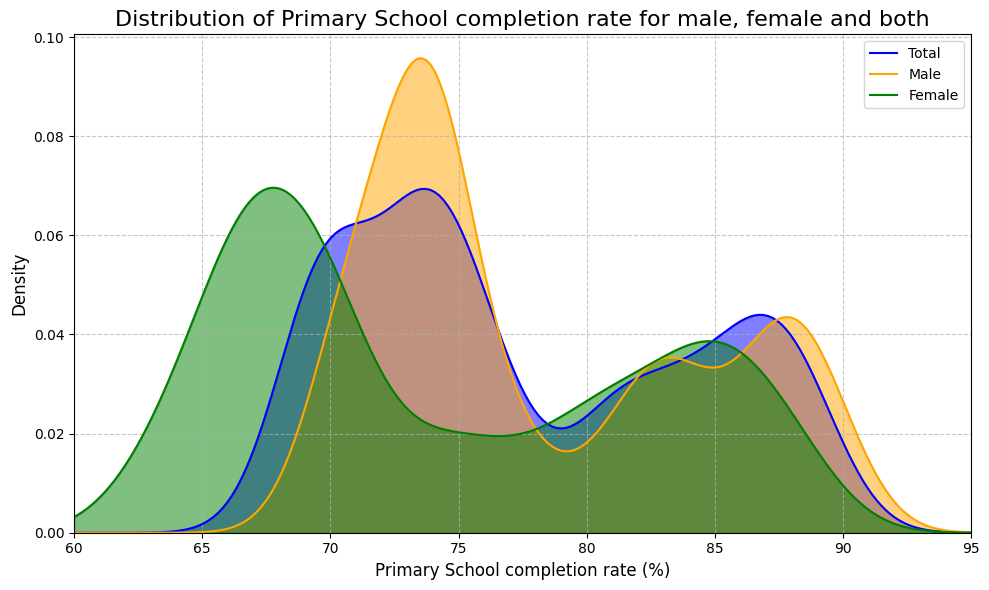

In [35]:
def plot_density(data, color, label):
    density = stats.gaussian_kde(data)
    xs = np.linspace(60, 95, 200)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    plt.plot(xs, density(xs), color=color, label=label)
    plt.fill_between(xs, density(xs), alpha=0.5, color=color)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot density for each category
plot_density(df11['cr_total'], 'blue', 'Total')
plot_density(df11['cr_male'], 'orange', 'Male')
plot_density(df11['cr_female'], 'green', 'Female')

# Customize the plot
plt.title('Distribution of Primary School completion rate for male, female and both', fontsize=16)
plt.xlabel('Primary School completion rate (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(60, 95)  # Adjust this range based on your actual data
plt.ylim(0)  # Start y-axis at 0
plt.legend(fontsize=10)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

***Observation from the above graph :

Distribution of Primay School completion rate of Male ,Female and Both shows that Male distribution is greater for higher completion rates compared to Female. Male Completion rate has never gone below 70% whereas Female completion rate has been below 70% and hence the Total completion rate.

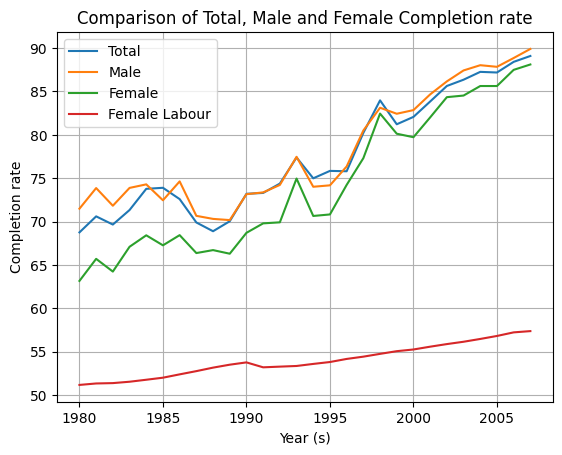

In [15]:
## Two Dimensional Visualization

x = range(1980, 2008, 1)
y1 = df11['cr_total']
y2 = df11['cr_male']
y3 = df11['cr_female']
y4 = df11['f_labour_mean']
plt.plot(x, y1, label = 'Total')
plt.plot(x, y2, label = 'Male')
plt.plot(x, y3, label = 'Female')
plt.plot(x, y4, label = 'Female Labour')
 
plt.xlabel('Year (s)')
plt.ylabel('Completion rate')
plt.title('Comparison of Total, Male and Female Completion rate')
plt.grid(True)
plt.legend()
plt.show()


***Observation from the above graph :

The above graph shows that the Women Primary school completion rate has increased over the years and difference between male and female completion rate has also decreased.These changes could have positive impact in Female labour participation percentage.This can be observed in the graph around the year 1998 where the women completion rate has steeply raised and the female labour participation rate has move to the next level (>55%).

### Question 2 : How does Female labour participation rate impact economic well being or GDP per capita growth ?

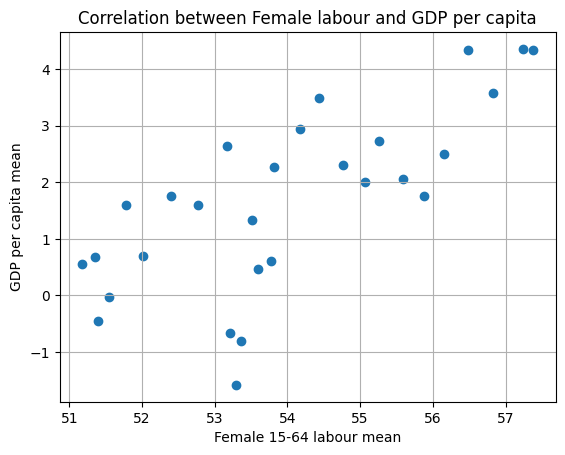

In [16]:
plt.scatter(df11['f_labour_mean'],df11['gdp_mean'])
plt.xlabel('Female 15-64 labour mean')
plt.ylabel('GDP per capita mean')
plt.title('Correlation between Female labour and GDP per capita')
plt.grid(True)
plt.show()


***Observation from the above graph :

The above graph shows that the female (of age 15 - 64) labour participation rate has a positive impact on GDP per capita .This can be observed by the scattered dots moving up from left to right

### Question 3: Does GDP per capita growth play a role in human wellbeing or life expectancy  ?

In [17]:
# Need to find the min, max, 25% , 50%, 75% percentile value of GDP to divide it into 4 levels - low, medium,mod high, high
df11.describe() 

,cr_total,cr_male,cr_female,f_labour_mean,gdp_mean,life_mean
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,77.490468,78.151564,74.294963,53.978326,1.680495,66.958031
std,6.752021,6.579403,8.109375,1.863760,1.602132,1.867484
min,68.760913,70.178222,63.166202,51.178836,-1.584481,63.220446
25%,72.281292,73.318678,67.227860,52.675661,0.591137,65.787500
50%,75.399911,74.466055,70.740785,53.687566,1.755102,67.059687
75%,83.878812,83.510066,82.124035,55.344180,2.662145,68.167763
max,89.092857,89.906742,88.113778,57.381481,4.359439,70.139712


In [18]:
# GDP has been categorized into low , medium, moderately high and high levels
bin_edges = [-1.584481, 0.591137, 1.755102, 2.662145, 4.359439]
bin_names = ['low', 'medium', 'mod_high', 'high']
df11['gdp_levels'] = pd.cut(df11['gdp_mean'], bin_edges, labels=bin_names)
df11.head()

,cr_total,cr_male,cr_female,f_labour_mean,gdp_mean,life_mean,gdp_levels
1980,68.760913,71.492997,63.166202,51.178836,0.557635,63.220446,low
1981,70.607390,73.868857,65.709645,51.346561,0.674624,63.657772,medium
1982,69.663622,71.833304,64.243215,51.387831,-0.457092,64.083614,low
1983,71.337957,73.886550,67.101606,51.546561,-0.020583,64.445644,low
1984,73.779945,74.295533,68.422549,51.775661,1.600173,64.814455,medium


In [19]:
# GDP has been grouped by levels and means are calculated for each level
df12 = df11.groupby('gdp_levels', as_index=False).mean()
df12

C:\Users\Admin\AppData\Local\Temp\ipykernel_111064\2282116568.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df12 = df11.groupby('gdp_levels', as_index=False).mean()


,gdp_levels,cr_total,cr_male,cr_female,f_labour_mean,gdp_mean,life_mean
0,low,72.834069,73.757329,68.550138,52.509977,-0.358556,65.674264
1,medium,72.005685,72.752733,67.319208,52.512396,1.178440,65.457838
2,mod_high,80.825954,81.187646,78.718118,54.920559,2.218797,67.869768
3,high,84.296164,84.908550,82.592387,55.970370,3.683299,68.830254


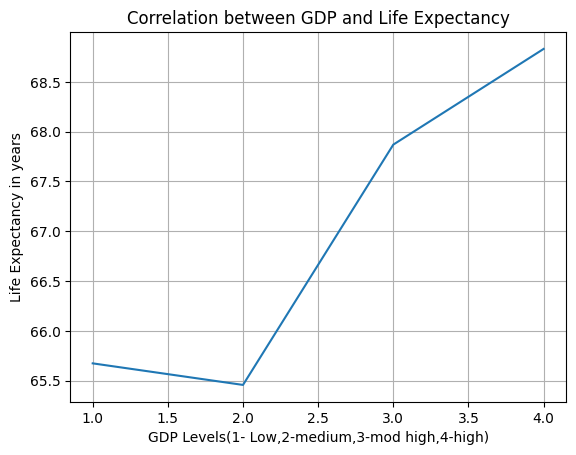

In [20]:
locations = [1,2,3,4]
height1 = [df12['life_mean'][0],df12['life_mean'][1],df12['life_mean'][2],df12['life_mean'][3]]
plt.plot(locations, height1)
plt.xlabel('GDP Levels(1- Low,2-medium,3-mod high,4-high)')
plt.ylabel('Life Expectancy in years')
plt.title('Correlation between GDP and Life Expectancy')
plt.grid(True)
plt.show()

***Observation from the above graph :

The above graph shows that when the GDP increases the life expectancy too increases.

<a id='conclusions'></a>
## Conclusions

> The Analysis shows that Women education plays an important role in economic and human wellbeing.This can be observed in the above report as Female primary school completion rate has a positive impact on Female labour participation rate.Female labour participation rate has a positive impact on GDP per capita growth.And GDP per capita growth may have an impact on Life expectancy. Life expectancy could also increase with other factors like more Government spending on heath and awareness about diseases and their vaccination etc.In a similar way World economy could also play a role on GDP per capita Growth.Due to time constrain and limitation in data availabily , I was not able to take those features into consideration while generating this report.My Future analysis plan would be to take various other factors as stated above into consideration as well.